# NAME: SAI SRI DACHEPALLI

## TOP 25 Instagram users by followers

## Question:

### Find Instagram accounts with highest number of followers, highest number of media and compare whether top followed accounts have highest media than the other accounts with less number of followers.

##### To find solution, I am using "socialblade website". I web scraped top 25 Instagram accounts by followers and media, and collected observations. I Cleaned the data collected and Visualized the observations.

In [1]:
###### Libraries imported
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
# website used for web scraping
url = "https://socialblade.com/instagram/"

In [3]:
# sending html requests to the site
html = requests.get(url)
results = html.text

In [4]:
import pickle
# pickling data
with open('data.pkl', 'wb') as f:
    pickle.dump(results, f)

# loading data from a pickle file
with open('data.pkl', 'rb') as f:
    new_results = pickle.load(f)
    print(type(new_results))

<class 'str'>


In [5]:
soup = BeautifulSoup(new_results)
print(soup)

<!DOCTYPE html>
<html><head>
<title>Track Instagram analytics, future predictions, &amp; Instagram usage graphs - Social Blade</title>
<meta content="View the daily Instagram analytics, track progress charts, view future predictions, Instagram top charts, Instagram influencers, &amp; more!" name="description"/>
<meta content="Instagram statistics, Instagram analytics, daily statistics, daily graphs, Instagram users, top Instagram users, top charts" name="keywords"/>
<meta charset="utf-8"/>
<meta content="website" property="og:type"/>
<meta content="View the daily Instagram analytics, track progress charts, view future predictions, Instagram top charts, Instagram influencers, &amp; more!" property="og:description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="socialblade" name="twitter:site"/>
<meta content="View the daily Instagram analytics, track progress charts, view future predictions, Instagram top charts, Instagram influencers, &amp; more!" name="twit

In [6]:
body = soup.findAll("div",{"class": "table-body"})
print(body)

[<div class="table-body">
<div class="table-cell section-rank">1</div>
<div class="table-cell section-grade" style="font-weight: bold;"><span style="color:#00bee7;">A++</span> </div>
<div class="table-cell section-med"><a href="/instagram/user/therock">therock</a></div>
<div class="table-cell section-lg">therock</div>
<div class="table-cell section-sm">4,279</div>
<div class="table-cell section-med">145,664,920</div>
<div class="table-cell section-med">370</div>
</div>, <div class="table-body">
<div class="table-cell section-rank">2</div>
<div class="table-cell section-grade" style="font-weight: bold;"><span style="color:#00bee7;">A++</span> </div>
<div class="table-cell section-med"><a href="/instagram/user/leomessi">leomessi</a></div>
<div class="table-cell section-lg">Leo Messi</div>
<div class="table-cell section-sm">474</div>
<div class="table-cell section-med">123,681,431</div>
<div class="table-cell section-med">228</div>
</div>, <div class="table-body">
<div class="table-cell s

In [7]:
def prepare_table_row(row):
    lst = [i.text for i in row if i !=u'\n']
    #return lst
    return dict(rank = int(lst[0]), grade = str(lst[1]), username = str(lst[2]),Name = str(lst[3]), media = float(lst[4].replace(",","")), followers = float(lst[5].replace(",","")), following = float(lst[6].replace(",","")))

In [8]:
# printing the result of first row
print(prepare_table_row(body[0]))

{'rank': 1, 'grade': 'A++ ', 'username': 'therock', 'Name': 'therock', 'media': 4279.0, 'followers': 145664920.0, 'following': 370.0}


In [9]:
data = []
for tr in body:
    datum = prepare_table_row(tr)
    for a in tr.find_all('a', href= True):
        datum['url'] = a['href']
    data.append(datum)

In [10]:
# storing the result in pandas data frame
df = pd.DataFrame(data)
df

,Name,followers,following,grade,media,rank,url,username
0,therock,145664920.0,370.0,A++,4279.0,1,/instagram/user/therock,therock
1,Leo Messi,123681431.0,228.0,A++,474.0,2,/instagram/user/leomessi,leomessi
2,3n310ta,113580705.0,993.0,A++,4430.0,3,/instagram/user/neymarjr,neymarjr
3,National Geographic,112543877.0,131.0,A++,20472.0,4,/instagram/user/natgeo,natgeo
4,Jennifer Lopez,95676257.0,1100.0,A++,2583.0,5,/instagram/user/jlo,jlo
5,Miley Cyrus,94927303.0,780.0,A++,333.0,6,/instagram/user/mileycyrus,mileycyrus
6,nike,89376962.0,54.0,A++,731.0,7,/instagram/user/nike,nike
7,KATY PERRY,83254885.0,473.0,A++,1254.0,8,/instagram/user/katyperry,katyperry
8,Kevin Hart,76247132.0,555.0,A++,6368.0,9,/instagram/user/kevinhart4real,kevinhart4real
9,Real Madrid C.F.,74145674.0,40.0,A++,2755.0,10,/instagram/user/realmadrid,realmadrid


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
#%matplotlib inline

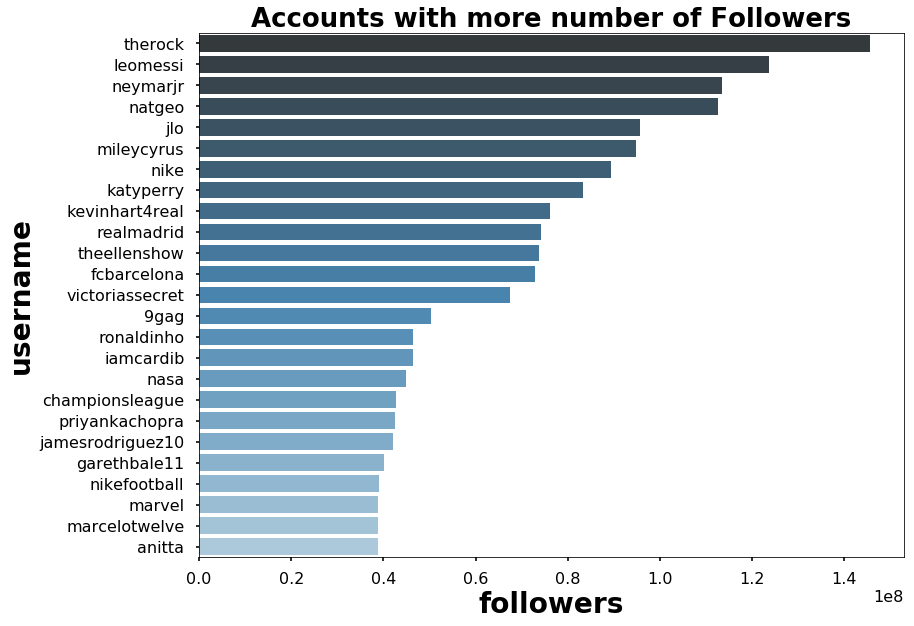

In [19]:
ax = sns.barplot(x="followers", y="username", data= df, palette=("Blues_d"))
style.use('seaborn-poster')
plt.title('Accounts with more number of Followers', fontweight='bold',fontsize =26)
plt.xlabel("followers", fontweight='bold',fontsize =28)
plt.ylabel("username", fontweight='bold',fontsize =28)
plt.tight_layout()
plt.savefig('subscribers.png', Transparent = True)


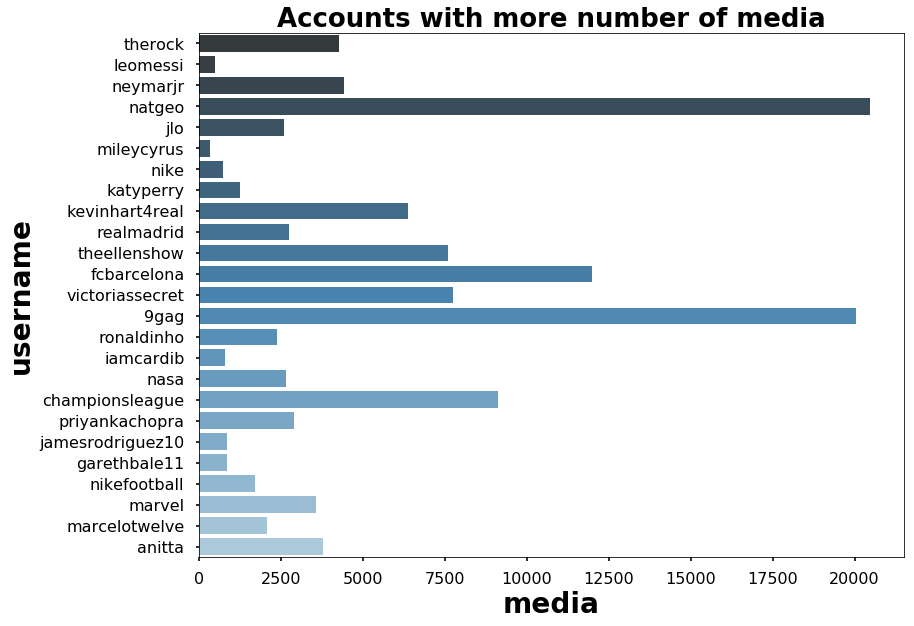

In [20]:
ax = sns.barplot(x="media", y="username", data= df, palette=("Blues_d"))
#sns.set_context("poster")
#style.use('seaborn-poster')
plt.title('Accounts with more number of media', fontweight='bold',fontsize =26)
plt.xlabel("media", fontweight='bold',fontsize =28)
plt.ylabel("username", fontweight='bold',fontsize =28)
plt.tight_layout()
plt.savefig('views.png', Transparent = True)

## Conclusion:

### From the above graphs, I can clearly state that "therock" has highest number of followers but not highest media as we can see "natgeo" has highest number of media.

### Also, 9gag which has second highest media, has less number of followers compared to the accounts with highest followers

### So, from the above two graphs I can conclude that, an account with highest number of followers need not have highest media and I can also conclude that an account with highest number of media need not be an account with highest followers.